# Logistic Regression

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve

credits: https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data

### Reading Data from csv files

In [2]:

data = pd.read_csv('./data/Weather Training Data.csv')
test = pd.read_csv('./data/Weather Test Data.csv')

### A glance at Datasets

In [3]:
data.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [4]:
test.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


In [5]:
data.describe(include='all')

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,99516,99516,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,92995,93036.000000,92510,...,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,98537,99516.000000
unique,99516,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Row0,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,1,2393,NaN,NaN,NaN,NaN,NaN,6843,NaN,8052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76481,NaN
mean,NaN,NaN,12.176266,23.218513,2.353024,5.46132,7.615090,NaN,39.976966,NaN,...,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,NaN,0.224677
std,NaN,NaN,6.390882,7.115072,8.487866,4.16249,3.783008,NaN,13.581524,NaN,...,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,NaN,0.417372
min,NaN,NaN,-8.500000,-4.100000,0.000000,0.00000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,NaN,0.000000
25%,NaN,NaN,7.600000,17.900000,0.000000,2.60000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000
50%,NaN,NaN,12.000000,22.600000,0.000000,4.80000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000
75%,NaN,NaN,16.800000,28.200000,0.800000,7.40000,10.600000,NaN,48.000000,NaN,...,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,NaN,0.000000


In [6]:
data['RainTomorrow'].value_counts()

0    77157
1    22359
Name: RainTomorrow, dtype: int64

In [7]:
data.shape, test.shape

((99516, 23), (42677, 22))

### Pre-processing Steps

we shall be processing both the datasets simultaneously.

<p> <i>row ID</i> is unique in identifier and need not be necessary for training/prediction</p>

In [8]:
data.drop('row ID', axis=1, inplace=True)
test.drop('row ID', axis=1, inplace=True)

#### Nul values in each column

In [10]:
data.isnull().sum()*100/data.shape[0]

Location          0.000000
MinTemp           0.445155
MaxTemp           0.231119
Rainfall          0.983761
Evaporation      42.737851
Sunshine         47.547128
WindGustDir       6.552715
WindGustSpeed     6.511516
WindDir9am        7.040074
WindDir3pm        2.660879
WindSpeed9am      0.939547
WindSpeed3pm      1.843925
Humidity9am       1.238997
Humidity3pm       2.518188
Pressure9am       9.795410
Pressure3pm       9.783351
Cloud9am         37.754733
Cloud3pm         40.196551
Temp9am           0.616986
Temp3pm           1.913260
RainToday         0.983761
RainTomorrow      0.000000
dtype: float64

In [11]:
test.isnull().sum()*100/data.shape[0]

Location          0.000000
MinTemp           0.194944
MaxTemp           0.092447
Rainfall          0.429077
Evaporation      18.401061
Sunshine         20.598698
WindGustDir       2.822662
WindGustSpeed     2.803569
WindDir9am        3.021625
WindDir3pm        1.135496
WindSpeed9am      0.415009
WindSpeed3pm      0.798867
Humidity9am       0.543631
Humidity3pm       1.109369
Pressure9am       4.286748
Pressure3pm       4.265646
Cloud9am         16.163230
Cloud3pm         17.175128
Temp9am           0.291410
Temp3pm           0.825998
RainToday         0.429077
dtype: float64

In [12]:
data['RainToday'].value_counts(dropna=False)

No     76481
Yes    22056
NaN      979
Name: RainToday, dtype: int64

In [13]:
# replace the null values of RainToday with frequent value/mode
data['RainToday'] = data['RainToday'].fillna('No')
test['RainToday'] = test['RainToday'].fillna('No')
data['RainToday'].isnull().sum()

0

<AxesSubplot: xlabel='MinTemp'>

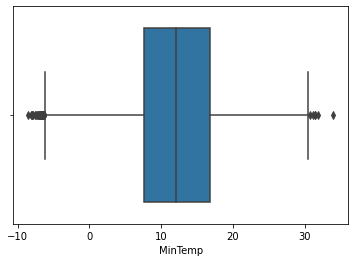

In [14]:
sns.boxplot(data, x='MinTemp')

In [15]:
data['MinTemp'].describe()

count    99073.000000
mean        12.176266
std          6.390882
min         -8.500000
25%          7.600000
50%         12.000000
75%         16.800000
max         33.900000
Name: MinTemp, dtype: float64

#### MinTemp and MaxTemp: for a given region, the min temp and max temp would almost be similar/around mean/median.

In [16]:
data.groupby(['Location', 'RainToday']).agg({'MinTemp':'median'}).reset_index()

,Location,RainToday,MinTemp
0,Adelaide,No,12.70
1,Adelaide,Yes,10.80
2,Albany,No,13.60
3,Albany,Yes,11.50
4,Albury,No,9.00
...,...,...,...
93,Witchcliffe,Yes,10.70
94,Wollongong,No,14.50
95,Wollongong,Yes,15.50
96,Woomera,No,13.00


# transform is used when we expect the output to have same number of records as of the main df.

In [17]:
data['loc_min'] = data.groupby(['Location', 'RainToday'])['MinTemp'].transform('median')
data.loc[data['MinTemp'].isnull(), 'MinTemp'] = data.loc[data['MinTemp'].isnull(), 'loc_min']
temp_df = data[['Location', 'RainToday', 'loc_min']].drop_duplicates(keep='first')

data.drop('loc_min', axis=1, inplace=True)

test = test.merge(temp_df, on=['Location', 'RainToday'], how='left')
test.loc[test['MinTemp'].isnull(), 'MinTemp'] = test.loc[test['MinTemp'].isnull(), 'loc_min']
test.drop('loc_min', axis=1, inplace=True)

In [18]:
print(data['MinTemp'].isnull().sum())
print(test['MinTemp'].isnull().sum())


0
0


In [19]:
data['loc_max'] = data.groupby(['Location', 'RainToday'])['MaxTemp'].transform('median')
data.loc[data['MaxTemp'].isnull(), 'MaxTemp'] = data.loc[data['MaxTemp'].isnull(), 'loc_max']
temp_df = data[['Location', 'RainToday', 'loc_max']].drop_duplicates(keep='first')
print(temp_df.head())
data.drop('loc_max', axis=1, inplace=True)

test = test.merge(temp_df, on=['Location', 'RainToday'], how='left')
test.loc[test['MaxTemp'].isnull(), 'MaxTemp'] = test.loc[test['MaxTemp'].isnull(), 'loc_max']
test.drop('loc_max', axis=1, inplace=True)

print(data['MaxTemp'].isnull().sum())
print(test['MaxTemp'].isnull().sum())

           Location RainToday  loc_max
0            Albury        No    23.10
5            Albury       Yes    17.05
2142  BadgerysCreek        No    23.50
2149  BadgerysCreek       Yes    22.30
4183          Cobar        No    26.60
0
0


In [20]:
data[['Rainfall', 'RainToday']].sample(20)

,Rainfall,RainToday
69107,2.4,Yes
81199,3.0,Yes
68390,0.8,No
27916,11.2,Yes
36012,31.4,Yes
39401,0.2,No
76801,0.0,No
15423,0.0,No
77499,0.0,No
8380,0.0,No


In [23]:
data['Rainfall'][(data['Rainfall']>0)&(data['RainToday']=='Yes')].median()

5.2

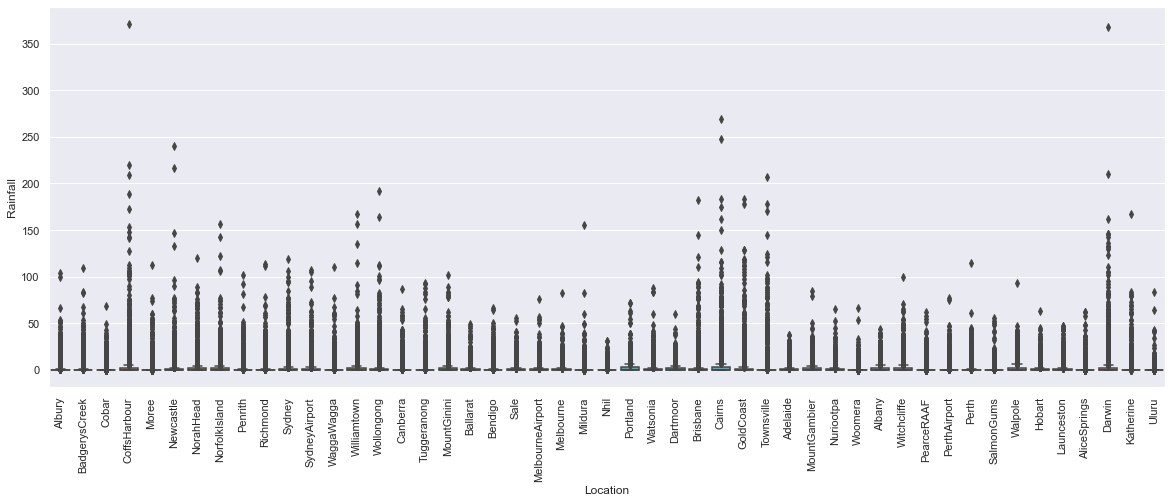

In [22]:
sns.set_theme(rc={'figure.figsize':(20,7)})
ax = sns.boxplot(data, x='Location', y='Rainfall')
ax.tick_params(axis='x', rotation=90)
plt.show()

#### When there is RainToday, there must be some measurement to it.

In [24]:
# if there is RainToday, there must be some non-zero value in Rainfall

data.loc[(data['Rainfall'].isnull())&(data['RainToday']=='No'), 'Rainfall'] = 0
test.loc[(test['Rainfall'].isnull())&(test['RainToday']=='No'), 'Rainfall'] = 0

data.loc[(data['Rainfall'].isnull())&(data['RainToday']=='Yes'), 'Rainfall'] = data['Rainfall'][(data['Rainfall']>0)&(data['RainToday']=='Yes')].median()
test.loc[(test['Rainfall'].isnull())&(test['RainToday']=='Yes'), 'Rainfall'] = data['Rainfall'][(data['Rainfall']>0)&(data['RainToday']=='Yes')].median()


In [25]:
print(data['Rainfall'].isnull().sum())
print(test['Rainfall'].isnull().sum())

0
0


#### The rate of evaporation is lesser when there is rain

In [26]:
data_sale = data[['Location', 'Evaporation', 'RainToday']][data['Location']=='Sale']
data_sale.groupby(['Location','RainToday']).agg({'Evaporation':['mean', 'median']}).reset_index()

Location RainToday Evaporation       
                            mean median
0     Sale        No    3.972154    3.6
1     Sale       Yes    3.106618    2.8

In [27]:
data_sale = data[['Location', 'Evaporation', 'RainToday']][data['Location']=='Canberra']
data_sale.groupby(['Location','RainToday']).agg({'Evaporation':['mean', 'median']}).reset_index()

Location RainToday Evaporation       
                             mean median
0  Canberra        No    4.605288    4.0
1  Canberra       Yes    3.871245    3.2

In [28]:
data['temp_evo'] = data.groupby(['Location', 'RainToday'])['Evaporation'].transform('median')
data['temp_evo'].isnull().sum()

30968

In [29]:
data['temp_evo1'] = data.groupby(['RainToday'])['Evaporation'].transform('median')
print(data['temp_evo1'].isnull().sum())
data.loc[data['temp_evo'].isnull(), 'temp_evo'] = data.loc[data['temp_evo'].isnull(), 'temp_evo1']

0


In [30]:
print(data['temp_evo'].isnull().sum())

0


In [31]:
data.loc[data['Evaporation'].isnull(), 'Evaporation'] = data.loc[data['Evaporation'].isnull(), 'temp_evo']
data['Evaporation'].isnull().sum()

0

In [32]:
temp_df = data[['Location', 'RainToday', 'temp_evo']].drop_duplicates(keep='first')
test = test.merge(temp_df, on = ['Location', 'RainToday'], how='left')
test.loc[test['Evaporation'].isnull(), 'Evaporation'] = test.loc[test['Evaporation'].isnull(), 'temp_evo']
test['Evaporation'].isnull().sum()

0

In [33]:
data.drop(['temp_evo', 'temp_evo1'], axis=1, inplace=True)
test.drop(['temp_evo'], axis=1, inplace=True)

In [34]:
def _impute_nulls(data, test_df, grp_cols, sub_grp_cols, null_col, agg_type='median'):
    
    # first create the median values - it should not have any nulls
    data['temp_col'] = data.groupby(grp_cols)[null_col].transform(agg_type)
    data['temp_col1'] = data.groupby(sub_grp_cols)[null_col].transform(agg_type)
    
    # in train dataset, assign the agg_type to null values in temp_col column
    data.loc[data['temp_col'].isnull(), 'temp_col'] = data.loc[data['temp_col'].isnull(), 'temp_col1']
    print(f"Null values in temp col for {null_col} is {data['temp_col'].isnull().sum()}")
    
    # impute the median values to null_col in train
    data.loc[data[null_col].isnull(), null_col] = data.loc[data[null_col].isnull(), 'temp_col']

    grp_cols.append('temp_col')
    # for imputing the medians to test, create a join df
    temp_df = data[grp_cols].drop_duplicates(keep='first')
    grp_cols.remove('temp_col')
    test_df = test_df.merge(temp_df, on=grp_cols, how='left')
    test_df.loc[test_df[null_col].isnull(), null_col] = test_df.loc[test_df[null_col].isnull(), 'temp_col']

    print(f"Null values in {null_col} is {data[null_col].isnull().sum()}, {test_df[null_col].isnull().sum()}")

    data.drop(['temp_col', 'temp_col1'], axis=1, inplace=True)
    test_df.drop(['temp_col'], axis=1, inplace=True)
    return data, test_df

In [36]:
def get_series_mode(series):
    mode = series.mode()
    if mode.size == 1:
        return mode[0]
    return 'X'

In [37]:
get_series_mode(data['WindGustDir'])

'W'

In [39]:
cat_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for col in cat_cols:
    data, test = _impute_nulls(data, test, ['Location', 'RainToday'], ['RainToday'], col, agg_type=get_series_mode)

Null values in temp col for WindGustDir is 0
Null values in WindGustDir is 0, 0
Null values in temp col for WindDir9am is 0
Null values in WindDir9am is 0, 0
Null values in temp col for WindDir3pm is 0
Null values in WindDir3pm is 0, 0


In [40]:
for col in ['Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
            'Temp9am', 'Temp3pm']:
    data, test = _impute_nulls(data, test, ['Location', 'RainToday'], ['RainToday'], col)

Null values in temp col for Sunshine is 0
Null values in Sunshine is 0, 0
Null values in temp col for WindGustSpeed is 0
Null values in WindGustSpeed is 0, 0
Null values in temp col for WindSpeed9am is 0
Null values in WindSpeed9am is 0, 0
Null values in temp col for WindSpeed3pm is 0
Null values in WindSpeed3pm is 0, 0
Null values in temp col for Humidity9am is 0
Null values in Humidity9am is 0, 0
Null values in temp col for Humidity3pm is 0
Null values in Humidity3pm is 0, 0
Null values in temp col for Pressure9am is 0
Null values in Pressure9am is 0, 0
Null values in temp col for Pressure3pm is 0
Null values in Pressure3pm is 0, 0
Null values in temp col for Cloud9am is 0
Null values in Cloud9am is 0, 0
Null values in temp col for Cloud3pm is 0
Null values in Cloud3pm is 0, 0
Null values in temp col for Temp9am is 0
Null values in Temp9am is 0, 0
Null values in temp col for Temp3pm is 0
Null values in Temp3pm is 0, 0


#### Verify if all nulls are handled

In [41]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [42]:
test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [43]:
cat_cols.extend(['Location', 'RainToday'])

for col in cat_cols:
    print(col, ":", data[col].nunique())

WindGustDir : 17
WindDir9am : 16
WindDir3pm : 17
Location : 49
RainToday : 2


In [44]:
for col in cat_cols:
    print(col, ":", test[col].nunique())

WindGustDir : 17
WindDir9am : 16
WindDir3pm : 17
Location : 49
RainToday : 2


In [45]:
num_cols = [col for col in data.columns if col not in cat_cols and col!='RainTomorrow']
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [46]:
cat_cols

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location', 'RainToday']

### Encode and Scale

#### Create Pipeline for Continuous columns

In [47]:
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

In [48]:
X_train, X_val, y_train, y_val = train_test_split(
    data.drop('RainTomorrow', axis=1),
    data['RainTomorrow'],
    stratify = data['RainTomorrow'],
    test_size=0.2, random_state=120
)

In [49]:
numeric_transformer.fit_transform(X_train[num_cols])

array([[ 0.20661461, -0.8343124 ,  3.75283131, ...,  1.4269665 ,
        -0.27012753, -0.86706896],
       [ 0.7706293 ,  0.6000972 , -0.20530641, ..., -0.30320749,
         0.53099837,  0.57283479],
       [-0.57673911,  0.30477758, -0.27727255, ...,  0.5618795 ,
        -0.17768992,  0.47204153],
       ...,
       [-0.57673911, -0.66555833,  0.20250172, ...,  0.994423  ,
        -0.31634633, -0.63668436],
       [-0.10672688,  0.92354251, -0.27727255, ...,  0.5618795 ,
         0.25368556,  0.99040688],
       [ 0.31628413,  0.92354251, -0.27727255, ..., -1.60083799,
         0.22287302,  0.99040688]])

In [50]:
numeric_transformer.transform(X_val[num_cols])

array([[-0.87441353, -1.46714017,  0.346434  , ..., -0.30320749,
        -1.22531609, -1.60141987],
       [ 1.19364031,  0.81103979, -0.27727255, ..., -0.30320749,
         1.08562398,  0.14086367],
       [ 0.31628413, -0.42649006, -0.27727255, ..., -1.60083799,
        -0.02362725, -0.50709302],
       ...,
       [ 1.67931962,  2.20326088, -0.27727255, ...,  1.4269665 ,
         1.96378121,  2.27192122],
       [ 1.16230616, -0.17335896,  0.46637757, ...,  1.4269665 ,
         0.45396703,  0.01127233],
       [-0.35740007, -0.5811813 ,  1.01811798, ...,  0.994423  ,
        -0.54744033, -0.79507377]])

In [51]:
numeric_transformer.transform(test[num_cols])

array([[ 0.11261217,  0.3469661 , -0.27727255, ..., -1.16829449,
         0.62343597,  0.21285886],
       [-0.46706959,  0.6704114 , -0.27727255, ...,  0.5618795 ,
         0.17665422,  0.68802709],
       [ 0.33195121,  0.24852622, -0.27727255, ...,  0.5618795 ,
         0.17665422,  0.41444538],
       ...,
       [-1.50109651, -0.10304476, -0.27727255, ...,  0.129336  ,
        -1.25612862,  0.05446944],
       [-0.74907693, -0.37023871, -0.27727255, ...,  0.129336  ,
        -0.91719075, -0.20471323],
       [-0.68640864,  0.52978301, -0.27727255, ..., -1.16829449,
        -0.28553379,  0.61603191]])

#### Create Pipeline for Categorical columns

In [52]:
categorical_transformer = Pipeline(
    steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))]
)

#### Column Transformer to encode and scale features

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

#### Pipeline for Model

In [54]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

## Model Build and Evaluation

In [55]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.848


C:\Users\sanje\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['WindGustDir', 'WindDir9am',
                                                   'WindDir3pm', 'Location',
                                                   'RainToday'])])),
                ('classifier', LogisticRegression())])

In [58]:

confusion_matrix(y_val, clf.predict(X_val))

array([[14573,   859],
       [ 2164,  2308]], dtype=int64)

In [59]:
print(classification_report(y_val, clf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     15432
           1       0.73      0.52      0.60      4472

    accuracy                           0.85     19904
   macro avg       0.80      0.73      0.76     19904
weighted avg       0.84      0.85      0.84     19904



In [60]:
f1_score(y_val, clf.predict(X_val), average='weighted')

0.838228578227526

Text(0, 0.5, 'True Positive Rate')

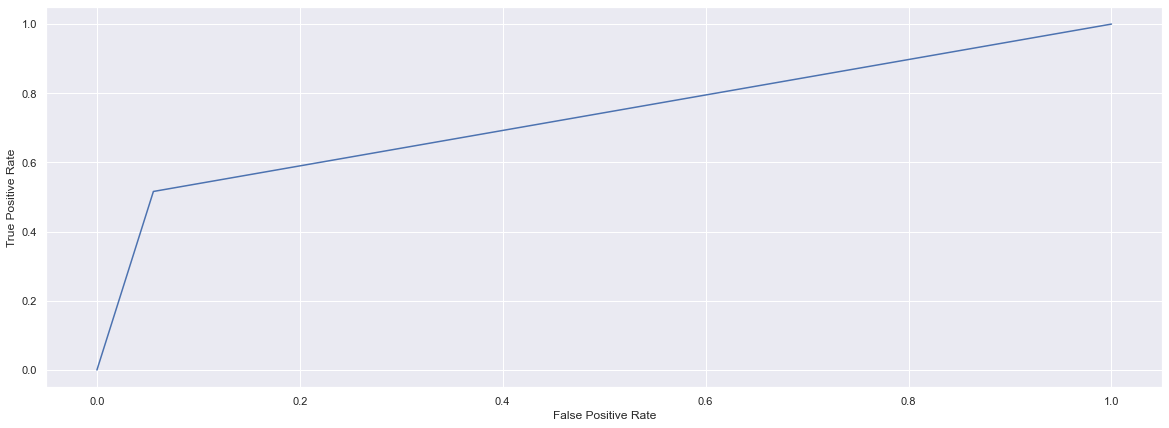

In [61]:
fpr, tpr, thresholds = roc_curve(y_val, clf.predict(X_val))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [88]:
y_test_hats = clf.predict(test)